# Financial and Economic Data Applications 
The use of Python in the financial industry has been increasing rapidly since 2005, led largely by the maturation of 
libararies and the availability of skilled python programmers. Institutions have found that Python is well-suited of 
as an interactive analysis environment as well as enabling robust systems to be developed often in a fraction of the time it would have taken in JAVA or C++... 

# Data Munging Topics

In [2]:
# Time Series and Cross-Section Alignment 
# On of the most time-consuming issues in working with the financial data is the so-called data alignment problem. 
# Two related time series may have indexes that don't line up perfectly or two DataFrame objects might have columns or row 
# labels that don't match. 

# Operations with Time Series of Different Frequencies
Economic time series often of annual, quarterly, and monthly frequencies. It is often necessary to perform operations.
Some are completely irregular, for example, earnings revisions for a stock may arrive at any time. 
The two main tools for frequency conversion and realignment are the 'resample' and 'reindex' methods. 
'resample' converts data to a fixed frequency while 'reindex' conforms data to a new index. Both support optional interpolation logic. 

In [3]:
# consider a small weekly time series of stock prices and volumes. 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

# Let's create a small time series with weekly frequency. 
# The data is about the stock price and volume of a company.
# We will use the following data for our example.  

ts1 = Series(
    np.random.randn(3),
    index = pd.date_range('2012-6-13', periods = 3, freq = 'W-WED')
            )

In [4]:
ts1

2012-06-13   -0.407684
2012-06-20   -0.501774
2012-06-27    0.737268
Freq: W-WED, dtype: float64

In [5]:
# If you resample this to business daily(Monday-Friday) frequency, you get holes on the days where there is no data. 
# To fill the holes, you can use the asfreq method. 
ts1.resample('B') 

In [7]:
print(ts1.resample('B')) 

DatetimeIndexResampler [freq=<BusinessDay>, axis=0, closed=left, label=left, convention=start, origin=start_day]


In [10]:
ts1.resample('B').ffill()

2012-06-13   -0.407684
2012-06-14   -0.407684
2012-06-15   -0.407684
2012-06-18   -0.407684
2012-06-19   -0.407684
2012-06-20   -0.501774
2012-06-21   -0.501774
2012-06-22   -0.501774
2012-06-25   -0.501774
2012-06-26   -0.501774
2012-06-27    0.737268
Freq: B, dtype: float64

In [11]:
# In practice, upsampling lower frequency data to a higher, regular frequency is a fine 
# solution, but in the more general irregular time series case it may be a poor fit. 
# Conisder an irregular sampled time series from the same general time period:

dates = pd.DataFrame(['2012-6-12', '2012-6-17', '2012-6-18', '2012-6-21', '2012-6-22']) 

In [13]:
ts2 = pd.Series(np.random.rand(5), index=dates[0])
ts2

0
2012-6-12    0.124310
2012-6-17    0.090882
2012-6-18    0.960148
2012-6-21    0.640752
2012-6-22    0.694223
dtype: float64

# Using periods instead of timestamps 

In [14]:
# Periods(representing time spans) provide an alternate means of working with different frequency time series. 
# especially financial or economic series with annual or quarterly frequency having a particular reporting convention. 
# For example, a company might announce its quarterly earnings with fiscal year ending in June, thus having Q-Jun frequency. 
# Consider a pair of macroeconomic time series related to GDP and inflation. 

gdp = Series( [1.78, 1.94, 2.08, 2.01, 2.15], index = pd.period_range('1984Q2', periods = 5, freq = 'Q-DEC') ) 
inflation = Series( [0.025, 0.045, 0.037, 0.04], index = pd.period_range('1982', periods = 4, freq = 'A-DEC') ) 

In [15]:
gdp 

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
Freq: Q-DEC, dtype: float64

In [16]:
inflation

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [17]:
inf_q = inflation.asfreq('Q-DEC', how = 'end') 

In [18]:
inf_q 

1982Q4    0.025
1983Q4    0.045
1984Q4    0.037
1985Q4    0.040
Freq: Q-DEC, dtype: float64

In [19]:
# That time series can then be reindexed with forward-filling to match gdp: 
inf_q.reindex(gdp.index, method = 'ffill') 

1984Q2    0.045
1984Q3    0.045
1984Q4    0.037
1985Q1    0.037
1985Q2    0.037
Freq: Q-DEC, dtype: float64

# Time of day and "as of" Data selection 

In [20]:
# Suppose you have a long time series containing intraday market data and you want to extract the prices at a particular time of day 
# on each day of the data. 
# What if the data are irregular such that observations do not fall exactly on the desired time? 
# In practice this task can make for error-prone data muning if you are not careful. 
# Here is a small sample of such data.
# Make an intraday date range and time series 

rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq = 'T')  

In [23]:
rng = rng.append([rng + pd.DateOffset(days=i) for i in range(1, 4)]).astype('datetime64[ns]')


In [24]:
ts = Series(np.arange(len(rng), dtype = float), index = rng) 

In [25]:
ts 

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
                        ...  
2012-06-04 15:55:00    1555.0
2012-06-04 15:56:00    1556.0
2012-06-04 15:57:00    1557.0
2012-06-04 15:58:00    1558.0
2012-06-04 15:59:00    1559.0
Length: 1560, dtype: float64

In [26]:
# Indexing with a Python datetime.time object will extract values at those times 
from datetime import time
ts[time(10, 0)] 

2012-06-01 10:00:00      30.0
2012-06-02 10:00:00     420.0
2012-06-03 10:00:00     810.0
2012-06-04 10:00:00    1200.0
dtype: float64

In [27]:
# Under the hood, this uses an instance method at_time (available on individual time series and DataFrame objects alike): 
ts.at_time(time(10, 0))

2012-06-01 10:00:00      30.0
2012-06-02 10:00:00     420.0
2012-06-03 10:00:00     810.0
2012-06-04 10:00:00    1200.0
dtype: float64

In [28]:
# You can select values between two times using the related between_time method: 
ts.between_time(time(10,0), time(10, 1)) 

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-02 10:00:00     420.0
2012-06-02 10:01:00     421.0
2012-06-03 10:00:00     810.0
2012-06-03 10:01:00     811.0
2012-06-04 10:00:00    1200.0
2012-06-04 10:01:00    1201.0
dtype: float64

In [29]:
# As mentioned above, it might be the case that no data actually fall exactly at a time like 10 AM, but you might want to know the last known value at 10 AM. 
# Set most of the time series randomly to NA values: 

indexer = np.sort(np.random.permutation(len(ts))[700:]) 

In [30]:
irr_ts = ts.copy() 

In [31]:
irr_ts[indexer]=np.nan

In [32]:
irr_ts['2012-06-01 09:50':'2012-06-01 10:00'] 

2012-06-01 09:50:00    20.0
2012-06-01 09:51:00     NaN
2012-06-01 09:52:00     NaN
2012-06-01 09:53:00    23.0
2012-06-01 09:54:00    24.0
2012-06-01 09:55:00     NaN
2012-06-01 09:56:00     NaN
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00     NaN
2012-06-01 09:59:00    29.0
2012-06-01 10:00:00    30.0
dtype: float64

In [33]:
# By passing an array of timestamps to the "asof" method, you will obtain an array of the last valid(not-NaN) 
# values at or before each timestamp. So we construct an array of timestamps at 10 AM on each of the days in the time series: 

selection = pd.date_range('2012-06-01 10:00', periods = 4, freq = 'B') 

In [34]:
irr_ts.asof(selection) 

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00    1200.0
2012-06-05 10:00:00    1558.0
2012-06-06 10:00:00    1558.0
Freq: B, dtype: float64

# Splicing together data sources

In [35]:
# Chapter 7 described a number of strategies for merging together two related data sets. 
# In a financial or economic context, there are a few widely occurring use cases for this type of operations: 
#  1. Switching from one data source (a time series or collection of time series) to another at a specific point in time. 
#  2. Patching missing values in a time series at the beginning, middle, or end of a another time series. 
#  3. Completely replacing the data for a subset of symbols (countries, asset tickers and so on) 

In [36]:
# In the first case, switching from one set of time series to another at a specific instant, it is matter of splicing together two TimeSeries or DataFrame objects using pandas.concat. 
# Here is a small example of such an operation. 

data1 = DataFrame(np.ones((6, 3), dtype = float), columns = ['a', 'b', 'c'], index = pd.date_range('6/12/2012', periods = 6)) 

In [37]:
data2 = DataFrame(np.ones((6, 3), dtype = float) * 2, columns = ['a', 'b', 'c'], index = pd.date_range('6/13/2012', periods = 6))

In [39]:
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]]) 

In [40]:
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [41]:
# Suppose in a similar example that data1 was missing a time series present in data2. 

data2 = DataFrame(np.ones((6, 4), dtype = float) * 2, columns = ['a', 'b', 'c', 'd'], index = pd.date_range('6/13/2012', periods = 6)) 

In [42]:



sliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]]) 

In [43]:
sliced 

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [44]:
# Using combine_first, you can bring in data from before the splice point to extend the history for 'd' item: 

sliced_filled = sliced.combine_first(data2) 

In [45]:
sliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [46]:
# Since data2 does not have any values for 2012-06-12, no values are filled on that day. 
# DataFrame has a related method, "update" for performing in-place updates. You have to pass "overwrite=False" 
# to make it only fill the holes: 
spliced.update(data2, overwrite = False) 

In [47]:
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [48]:
# To replace the data for a subset of symbols, you can use any of the above techniques, 
# but sometimes it's simpler to just set the columns directly with DataFrame indexing. 
# Here is an example of that: 

cp_spliced = spliced.copy()

In [49]:
cp_spliced[['a', 'c']] = data1[['a', 'c']]

In [50]:
cp_spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,1.0,2.0,1.0
2012-06-16,1.0,2.0,1.0
2012-06-17,1.0,2.0,1.0
2012-06-18,NaN,2.0,NaN


# Return Indexes and Cumulative Returns 
In a financial context, returns usually refer to percent changes in the price of an asset. 

In [55]:
# %pip install yfinance

In [58]:
import yfinance as yf
price = yf.download('AAPL', start = '2014-01-01', end = '2015-01-01') 

[*********************100%%**********************]  1 of 1 completed


In [59]:
price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.296659,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.916719,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.008974,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.887325,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.994270,258529600
...,...,...,...,...,...,...
2014-12-24,28.145000,28.177500,28.002501,28.002501,25.034250,57918400
2014-12-26,28.025000,28.629999,28.002501,28.497499,25.476780,134884000
2014-12-29,28.447500,28.692499,28.424999,28.477501,25.458895,110395600


In [60]:
price1 = price[['Adj Close']]

In [61]:
price1[-5:]

,Adj Close
Date,
2014-12-24,25.034250
2014-12-26,25.476780
2014-12-29,25.458895
2014-12-30,25.148235
2014-12-31,24.669947


In [62]:
# For Apple, which has no dividends, computing the cumulative percent return between two points in time requires computing only the percen change in the price. 
returns = price1.pct_change() 

In [63]:
returns 

,Adj Close
Date,
2014-01-02,NaN
2014-01-03,-0.021966
2014-01-06,0.005453
2014-01-07,-0.007152
2014-01-08,0.006333
...,...
2014-12-24,-0.004709
2014-12-26,0.017677
2014-12-29,-0.000702


In [64]:
# For other stocks with dividend payouts, computing how much money you make from holding a stock can be more complicated. 
# The adjusted close values used here have been adjusted for splits and dividends.
# However,in all cases, it's quite common to derive a "return index". which is a time series indicating the value of a unit investment(one dollay say) 
# Many assumptions can underlie the return index, for example, some will choose to reinvest profit and others not. 
# In the case of Apple, we can compute a simple return index using "cumprod" 

returns = price.pct_change() 

In [65]:
ret_index = (1 + returns).cumprod() 

In [66]:
ret_index[0]=1 # set first value to 1 

In [68]:
ret_index[0]

Date
2014-01-02    1
2014-01-03    1
2014-01-06    1
2014-01-07    1
2014-01-08    1
             ..
2014-12-24    1
2014-12-26    1
2014-12-29    1
2014-12-30    1
2014-12-31    1
Name: 0, Length: 252, dtype: int64

In [69]:
# with a return index in hand, computing cumulative returns at a particular resolution is simple. 
# For example, to compute the 1-month return for each day, you can use the "shift" method:
m_returns = ret_index.resample('BM').last().pct_change() 

In [70]:
m_returns['2014']

/var/folders/vq/73zp4qns2cjdsxcw0bzvh98w0000gn/T/ipykernel_71647/3666683160.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  m_returns['2014']


,Open,High,Low,Close,Adj Close,Volume,0
Date,,,,,,,
2014-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-28,0.068460,0.062250,0.057887,0.051219,0.057511,-0.199718,0.0
2014-03-31,0.019184,0.015129,0.026450,0.019953,0.019953,-0.546550,0.0
2014-04-30,0.099049,0.108393,0.100517,0.099396,0.099397,1.707316,0.0
2014-05-30,0.076505,0.074638,0.066294,0.072718,0.078709,0.235152,0.0
2014-06-30,0.010533,0.018536,0.025012,0.027662,0.027662,-0.649075,0.0
2014-07-31,0.054940,0.039688,0.035183,0.028731,0.028732,0.148754,0.0
2014-08-29,0.058666,0.055926,0.072065,0.072176,0.077508,-0.215471,0.0
2014-09-30,-0.019930,-0.013217,-0.016340,-0.017073,-0.017073,0.239244,0.0


# Group Transforms and Analysis 

In [71]:
# Let's consider a collection of hypothetical stock portfolios. Randomly generate a broad universe of 2000 tickers. 

import random; random.seed(0)
import string
N =1000 
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)]) 

In [72]:
# Then create a DataFrame containing 3 columns representing the hypothetical, but random portfolios for a subset of tickers. 
M = 500
df = DataFrame({
    'Momentum': np.random.randn(M) / 200 + 0.03,
    'Value': np.random.randn(M) / 200 + 0.08,
    'ShortInterest': np.random.randn(M) / 200 - 0.02
}, index = tickers[:M]) 

In [73]:
# Next, let's create a random industry classification for the tickers. 
# To keep things simple, I'll just keep it to 2 industries, storing the mapping in Series. 

ind_names = np.array(['FINANCIAL', 'TECH']) 
sampler = np.random.randint(0, len(ind_names), N) 
industries = Series(ind_names[sampler], index = tickers, name = 'industry') 

In [74]:
# Now, we can groupby "industries" and carry out group aggregation and transformations. 
by_industry = df.groupby(industries) 

In [75]:
by_industry.mean() 

,Momentum,Value,ShortInterest
industry,,,
FINANCIAL,0.030052,0.080235,-0.019862
TECH,0.030116,0.079874,-0.020934


In [77]:
by_industry.describe().T 

industry              FINANCIAL        TECH
Momentum      count  240.000000  260.000000
              mean     0.030052    0.030116
              std      0.005045    0.004960
              min      0.015596    0.018092
              25%      0.026429    0.026960
              50%      0.030261    0.030200
              75%      0.033465    0.033576
              max      0.046300    0.045055
Value         count  240.000000  260.000000
              mean     0.080235    0.079874
              std      0.005078    0.004908
              min      0.067160    0.068890
              25%      0.076821    0.076505
              50%      0.080254    0.080054
              75%      0.083700    0.083384
              max      0.095400    0.094899
ShortInterest count  240.000000  260.000000
              mean    -0.019862   -0.020934
              std      0.005039    0.004946
              min     -0.034472   -0.034582
              25%     -0.023149   -0.024545
              50%     -0.019821   -0.020704
              75%     -0.016626   -0.017695
              max     -0.006746   -0.008445

In [78]:
# By defining transformation functions, it's easy to transform these portfolios by industry. 
# For example, standardizing within industry is widely used in equity portfolio construction. 
# Here is a simple standardization function: 

def zscore(group):
    return (group - group.mean()) / group.std() 

In [79]:
df_stand = by_industry.apply(zscore) 

/var/folders/vq/73zp4qns2cjdsxcw0bzvh98w0000gn/T/ipykernel_71647/3740576897.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_stand = by_industry.apply(zscore)


In [80]:
# You can verify that each industry has mean 0 and standard deviation 1: 
df_stand.groupby(industries).agg(['mean', 'std']).loc[ind_names] 

Momentum              Value      ShortInterest     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL  2.257453e-16  1.0 -2.913410e-15  1.0 -4.144833e-16  1.0
TECH      -4.340545e-16  1.0 -1.980040e-15  1.0  4.631845e-16  1.0

In [81]:
# Other built-in kind of tansformations, like "rank", can be used more concisely. 
ind_rank = by_industry.rank(ascending = False) 

In [82]:
ind_rank.groupby(industries).agg(['min', 'max']).loc[ind_names]

Momentum        Value        ShortInterest       
               min    max   min    max           min    max
industry                                                   
FINANCIAL      1.0  240.0   1.0  240.0           1.0  240.0
TECH           1.0  260.0   1.0  260.0           1.0  260.0

In [84]:
# In quantitative equity "rank and standardize" is a common sequence of transforms. 
# You could do this by chaining the "rank" and "zscore"  like so 
by_industry.apply(lambda x : zscore(x.rank())) 

/var/folders/vq/73zp4qns2cjdsxcw0bzvh98w0000gn/T/ipykernel_71647/2588639404.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  by_industry.apply(lambda x : zscore(x.rank()))


,Momentum,Value,ShortInterest
MYNBI,-1.433176,-0.857025,-1.101889
QPMZJ,0.396104,-1.577214,-1.289138
PLSGQ,1.097078,-0.764630,1.482718
EJEYD,1.260331,-1.101889,-1.663637
TZIRW,0.844418,1.163568,0.113032
...,...,...,...
JPHKQ,-1.456122,1.070483,0.073139
VACPK,-0.046543,-0.897610,0.378991
MHNBS,0.684180,-0.208855,-0.151240
YBNCI,1.044274,1.548406,1.634829


# Group Factor Exposures 
Factor analysis is a technique in quantitative portfolio management. Portfolio holdings and performance are decomposed using one or more factors(risk factors are one example) represented as a portfolio of weights. 

In [85]:
# For example,  a stock price's co-movement with a benchmark (like S&P 500) is known as its beta. 
# a common risk factor. Let's consider example of a portfolio constructed from 3 randomly-generated factors(usually called the "factor loadings") and some weights. 
from numpy.random import rand 
fac1, fac2, fac3 = np.random.rand(3, 1000) 

In [86]:
from h11 import Data


ticker_subset = tickers.take(np.random.permutation(N)[:1000])
# weighted sum of factors plus noise 
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000), index = ticker_subset) 
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3}, index = ticker_subset) 

In [87]:
# Vector correlations between each factor and the portfolio may not indicate too much: 
factors.corrwith(port) 

f1    0.372333
f2   -0.700848
f3    0.173540
dtype: float64

In [89]:
# The standard way to compute the factor exposures is by least squares regression. 
# using pandas.ols from the "pandas.stats.ols" module, we can compute the least squares regression of the portfolio values on the factors. 
import statsmodels.api as sm 
import statsmodels.formula.api as smf

def regress(data, yvar, xvars): 
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1
    result = sm.OLS(Y, X).fit()
    return result.params 

In [90]:
regress(factors, 'f1', ['f2', 'f3']) 

f2           0.043592
f3           0.016200
intercept    0.484056
dtype: float64

In [91]:
# As you can see, the original factor weights can nearly be recovered since there was not too much additional random noise. 
# added to the portfolio. 
# Using groupby you can compute exposures industry by industry. To do so, write a short function that computes the 
# factor betas for each industry.
by_ind = factors.groupby(industries) 

In [92]:
def regress(data, yvar, xvars): 
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1
    result = sm.OLS(Y, X).fit()
    return result.params 

exposures = by_ind.apply(lambda x: regress(x, 'f1', ['f2', 'f3']))


In [93]:
exposures = exposures.unstack() 

In [97]:
exposures.T

           industry 
f2         FINANCIAL    0.073252
           TECH         0.019860
f3         FINANCIAL   -0.020532
           TECH         0.058432
intercept  FINANCIAL    0.506080
           TECH         0.456808
dtype: float64

# Decile and Quartile Analyses

In [98]:
# Analyzing data based on sample quantiles is another important tool for financial analysts. 
# For example, the performance of a stock portfolio could be broken down into quartiles(4 equal sized chunks) 
# based on each stock's price-to-earnings. 
# Using "qcut", you can calculate sample quantiles. 
# Let's consider a simple random dataset and a sample quantile decomposition. 
# As an example a simple trend-following "momentum strategy"  trading the S&P 500 index via the SPY ETF(exchange-traded fund) 
# download the price history from Yahoo! Finance. 

import yfinance as yf 
data = yf.download('SPY', start = '2020-01-01', end = '2021-01-01')  

[*********************100%%**********************]  1 of 1 completed


In [99]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,305.058441,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,302.748505,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,303.903473,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,303.048950,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,304.664062,68296000
...,...,...,...,...,...,...
2020-12-24,368.079987,369.029999,367.450012,369.000000,352.968018,26457900
2020-12-28,371.739990,372.589996,371.070007,372.170013,356.000305,39000400
2020-12-29,373.809998,374.000000,370.829987,371.459991,355.321106,53680500


In [105]:

# we'will compute daily returns and a function for transforming the returns into a trend signal formed from a lagged moving sum 
# of returns. 

def to_index(rets): 
    index = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index 




In [106]:
def trend_signal(rets, lookback, lag):
    signal = rets.rolling(window=lookback, min_periods=max(1, lookback - 5)).sum()
    return signal.shift(lag) 

In [107]:
signal = trend_signal(data['Adj Close'].pct_change(), 100, 3)  

In [109]:
# Resample to get the value for each Friday
friday_values = signal.resample('W-FRI').mean()  # Or use another appropriate aggregation function


In [110]:
# Generate a new date range that includes all business days in the original range
all_business_days = pd.date_range(start=friday_values.index.min(), end=friday_values.index.max(), freq='B')

# Reindex the Friday-resampled data to this new range and forward fill missing values
trade_friday = friday_values.reindex(all_business_days).ffill()


In [111]:
trade_rets =trade_friday.shift(1) * returns 

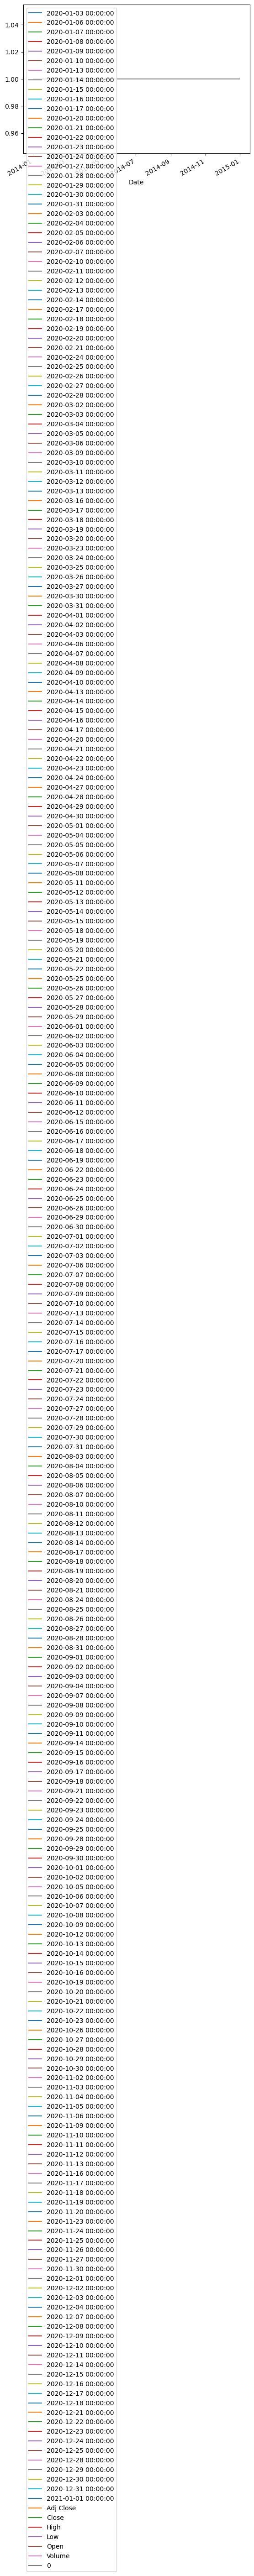

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

def to_index(rets):
    # Assuming 'rets' is a Series of returns
    index = (1 + rets).cumprod()
    index[0] = 1  # Starting point of the investment
    return index

# Example usage:
# Assuming trade_rets is your Series of returns with a datetime index
# trade_rets = pd.Series([...], index=pd.date_range(start="2020-01-01", periods=100, freq="D"))

# Convert returns to index
index_series = to_index(trade_rets)

# Plotting
index_series.plot()
plt.show()


# Signal Frontier Analysis 
Signal frontier analysis is a technique used to evaluate the performance of a trading signal. 

In [8]:
import pandas as pd
from pandas import DataFrame
import yfinance as yf
from datetime import datetime

# Convert the date string to a datetime object
start = datetime.strptime('01/01/2009', '%m/%d/%Y')
end = datetime.strptime('06/01/2012', '%m/%d/%Y')

# Format the datetime object in the format 'YYYY-MM-DD'
start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

names = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

def get_px(stock, start, end):
    return yf.download(stock, start=start, end=end)['Adj Close']

# Use the correctly formatted start and end dates
px = DataFrame({n: get_px(n, start, end) for n in names})


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
px = px.asfreq('B').ffill() 

In [12]:
rets = px.pct_change() 

<Axes: xlabel='Date'>

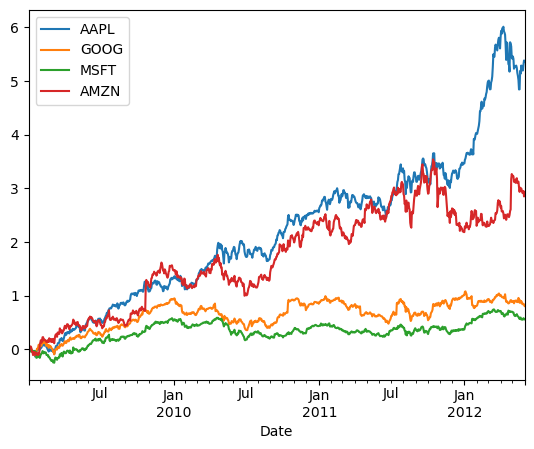

In [13]:
# calculate the percentage change 
((1 + rets).cumprod() - 1).plot() 

In [14]:
# For the portfolio construction, we'll compute momentum over a certain lookback period, 
# then rank in descending order and standardize. 

def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0) 

In [15]:
# with this transform function in hand, we can set up a strategy backtesting function that computes a portfolio 
# for a particular lookback and holding period (days between portfolio formation and portfolio holding). 
# returning the overall Sharpe ratio of the portfolio.

compound = lambda x : (1 + x).prod() - 1 
daily_sr = lambda x : x.mean() / x.std() 

def strat_sr (prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold 
    port = calc_mom(prices, lb, lag = 1)
    daily_rets = prices.pct_change()
    # Compute portfolio returns
    port = port.shift(1).resample(freq).first()
    returns = daily_rets.resample(freq).apply(compound)
    port_rets = (port * returns).sum(axis = 1)
    return daily_sr(port_rets) * np.sqrt(252 / hold) 

In [16]:
# When called with the prices and a parameter combination, this function returns a scalar value,
# the annualized Sharpe ratio.
strat_sr(px, 70, 30) 

0.45596840447194575

In [17]:
# From there, you can evaluate the strat_sr function over a grid of parameters, storing them as you go in a 
# defauldict and finally putting the results in a DataFrame. 
from collections import defaultdict 
lookbacks = range(20, 90, 5) 
holdings = range(20, 90, 5) 
dd = defaultdict(dict)
for lb in lookbacks: 
    for hold in holdings: 
        dd[lb][hold] = strat_sr(px, lb, hold) 
ddf = DataFrame(dd) 
ddf.index.name = 'Holding Period' 
ddf.columns.name = 'Lookback Period' 

In [25]:
# To visualize the results and get an idea of what's going on, here is a function that uses matplotlib
# to produce a heatmap with some adornments 
import matplotlib.pyplot as plt  
def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

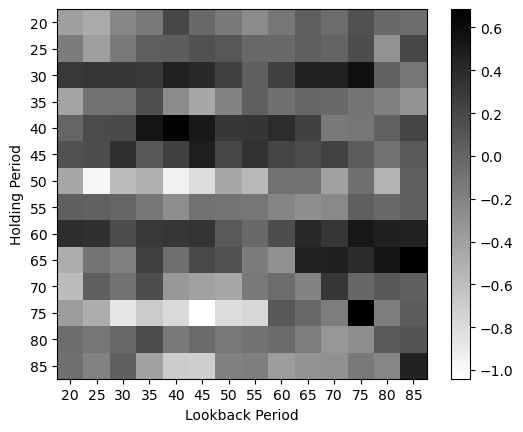

In [26]:
heatmap(ddf) 

# Future Contract Rolling 
A future is an ubiquitous form of derivative contract, it is an agreement to take delivery of a certain asset(usually a commodity) at a certain time in the future for a certain price. 
In practice, modeling and trading futures contracts requires on equities, currencies, and other assets. 
For example at any given time for a type of future(say silver or copper futures) multiple contracts with different expiration dates are traded. In many cases, the future contract expiring next(the near contract) will be the most liquid(highest volume and lowest bid-ask spread).  

In [29]:
# For the purpose of modeling and forecasting, it can be much easier to work with a continuous return index indicating 
# the profit and loss associated with always holding the near contract. Transitioning from an expiring contract to the next(or far) 
# contract is referred to as a "roll". 

# Computing a continuous future series from the individual contracts data is not necessarily a straightforward exercise and typically 
# requires a deeper understanding of the market and how the instruments are traded. 
# For example in practice when and how quickly would you trade oout of an expiring contract and into the next contract? 


# Let's consider a simple example of a continuous future. 
# Suppose we have two futures contracts, with the same underlying asset, but with different expiration dates.
# The price of the first contract is 100, and the price of the second contract is 105.
# The continuous future price is the price of the first contract times the price of the second contract.
# The continuous future price is 100 * 105 = 10500.

# In the case of a commodity future, the continuous future price is the price of the first contract times the price of the second contract.
# In the case of a stock future, the continuous future price is the price of the first contract times the price of the second contract. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import im
import yfinance as yf 
px = yf.download('SPY', start = '2020-01-01', end = '2021-01-01')['Adj Close']*10  

[*********************100%%**********************]  1 of 1 completed


In [32]:
px 

Date
2020-01-02    3050.584412
2020-01-03    3027.484436
2020-01-06    3039.035034
2020-01-07    3030.489502
2020-01-08    3046.640320
                 ...     
2020-12-24    3529.679871
2020-12-28    3560.003052
2020-12-29    3553.211060
2020-12-30    3558.281250
2020-12-31    3576.359863
Name: Adj Close, Length: 253, dtype: float64

In [33]:
# Now, a little bit of setup. I put a couple of S&P 500 futures contracts and expiry dates in a Series. 

from datetime import datetime
import pandas as pd
from math import exp 
expiry = {'ESU2': datetime(2020, 9, 20), 'ESZ2': datetime(2020, 12, 20)} 
expiry = Series(expiry).sort_values() 

In [34]:
expiry 

ESU2   2020-09-20
ESZ2   2020-12-20
dtype: datetime64[ns]

In [35]:
np.random.seed(12347) 
N = 200 
walk = (np.random.randint(0, 200, size = N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size = N) - 10) * 0.25
walk = walk.cumsum()

rng = pd.date_range(px.index[0], periods = len(px) + N, freq = 'B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = DataFrame({'ESU2': near, 'ESZ2': far}, index = rng)

In [36]:
prices.tail()

,ESU2,ESZ2
2021-09-21,3605.609863,3607.359863
2021-09-22,3591.859863,3594.109863
2021-09-23,3599.859863,3601.609863
2021-09-24,3616.359863,3615.609863
2021-09-27,3596.359863,3594.109863


In [37]:
# One way to splice time series together into a single continuous series is to construct a weighting matrix. 
# Active contracts would have a weight of 1 until the expiry date approaches. At that point you have to decide on a roll convention. 
# Here is a function that computes a weighting matrix with linear decay over a number of periods leading up to expiry.

def get_roll_weights(start, expiry, items, roll_periods = 5): 
    # start: first date to compute weighting DataFrame 
    # expiry: Series of ticker -> expiration dates 
    # items: sequence of contract names 
    
    dates = pd.date_range(start, expiry[-1], freq = 'B')
    weights = DataFrame(np.zeros((len(dates), len(items))), index = dates, columns = items) 
    
    prev_date = weights.index[0] 
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) -1:
            weights.loc[prev_date:ex_date - pd.offsets.BDay(), item] = 1 
            roll_rng = pd.date_range(end = ex_date - pd.offsets.BDay(), periods = roll_periods + 1, freq = 'B') 
            
            decay_weights = np.linspace(0, 1, roll_periods + 1) 
            weights.loc[roll_rng, item] = 1 - decay_weights 
            weights.loc[roll_rng, expiry.index[i+1]] = decay_weights 
        else:
            weights.loc[prev_date:, item] = 1
        prev_date = ex_date 
    return weights  # return the weighting matrix 


In [38]:
# The weights look like this around the ESU2 expiry: 
weights = get_roll_weights('6/1/2012', expiry, prices.columns) 

/var/folders/vq/73zp4qns2cjdsxcw0bzvh98w0000gn/T/ipykernel_67746/2432505782.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (item, ex_date) in enumerate(expiry.iteritems()):


In [39]:
weights.loc['2012-09-12':'2012-09-21'] 

,ESU2,ESZ2
2012-09-12,1.0,0.0
2012-09-13,1.0,0.0
2012-09-14,1.0,0.0
2012-09-17,1.0,0.0
2012-09-18,1.0,0.0
2012-09-19,1.0,0.0
2012-09-20,1.0,0.0
2012-09-21,1.0,0.0


In [40]:
# Finally, the rolled future returns are a just weighted sum of the contract returns. 
rolled_returns = (prices.pct_change() * weights).sum(1) 

In [41]:
rolled_returns.loc['2012-09-12':'2012-09-21']

2012-09-12    0.0
2012-09-13    0.0
2012-09-14    0.0
2012-09-17    0.0
2012-09-18    0.0
2012-09-19    0.0
2012-09-20    0.0
2012-09-21    0.0
Freq: B, dtype: float64

# Rolling Correlation and Linear Regression 
Dynamic models play an important role in financial modeling as they can be used to simulate trading decisions over a historical period. Moving window and exponentially weighted time series functions are an example of tools that are used for dynamic models. 

Correlation is one way to look at the co-movement betweeen the changes in two asset time series, while linear regression is a way to model the relationship between the two series. 

In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

aapl = yf.download('AAPL', start = '2000-01-01')['Adj Close']  
msft = yf.download('MSFT', start = '2000-01-01')['Adj Close'] 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
aapl_rets = aapl.pct_change() 
msft_rets = msft.pct_change() 

In [5]:
aapl_rets

Date
2000-01-03         NaN
2000-01-04   -0.084310
2000-01-05    0.014633
2000-01-06   -0.086539
2000-01-07    0.047369
                ...   
2024-02-16   -0.008430
2024-02-20   -0.004114
2024-02-21    0.004186
2024-02-22    0.011244
2024-02-23   -0.010034
Name: Adj Close, Length: 6074, dtype: float64

In [7]:
msft_rets 

Date
2000-01-03         NaN
2000-01-04   -0.033781
2000-01-05    0.010544
2000-01-06   -0.033497
2000-01-07    0.013067
                ...   
2024-02-16   -0.006149
2024-02-20   -0.003143
2024-02-21   -0.001514
2024-02-22    0.023547
2024-02-23   -0.003182
Name: Adj Close, Length: 6074, dtype: float64

<Axes: xlabel='Date'>

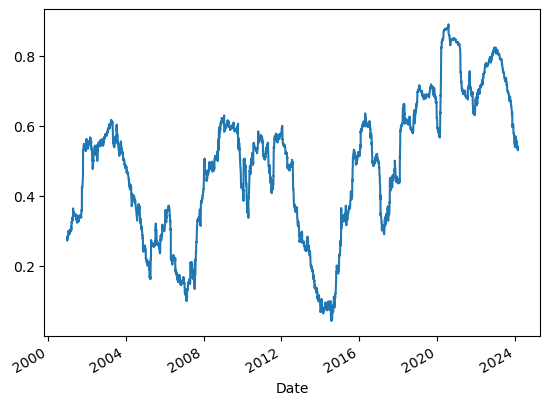

In [8]:
aapl_rets.rolling(window=250).corr(msft_rets).plot() 


In [10]:
# Check for NaNs or Infs and remove or impute them
aapl_rets_clean = aapl_rets.replace([np.inf, -np.inf], np.nan).dropna()
msft_rets_clean = msft_rets.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure both Series have the same length after cleaning
aapl_rets_clean, msft_rets_clean = aapl_rets_clean.align(msft_rets_clean, join='inner')

# Now you can re-run your model fitting
import statsmodels.api as sm
model = sm.OLS(aapl_rets_clean, sm.add_constant(msft_rets_clean)).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     1828.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:57:50   Log-Likelihood:                 14663.
No. Observations:                6073   AIC:                        -2.932e+04
Df Residuals:                    6071   BIC:                        -2.931e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      3.028      0.002       0.000       0.001
Adj Close      0.6177      0.014     42.750      0.000       0.589       0.646
==============================================================================
Omnibus:                     3856.524   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           793274.799
Skew:                          -1.969   Prob(JB):                         0.00
Kurtosis:                      58.852   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.params 

const        0.000841
Adj Close    0.617685
dtype: float64